**Efficiency**
---

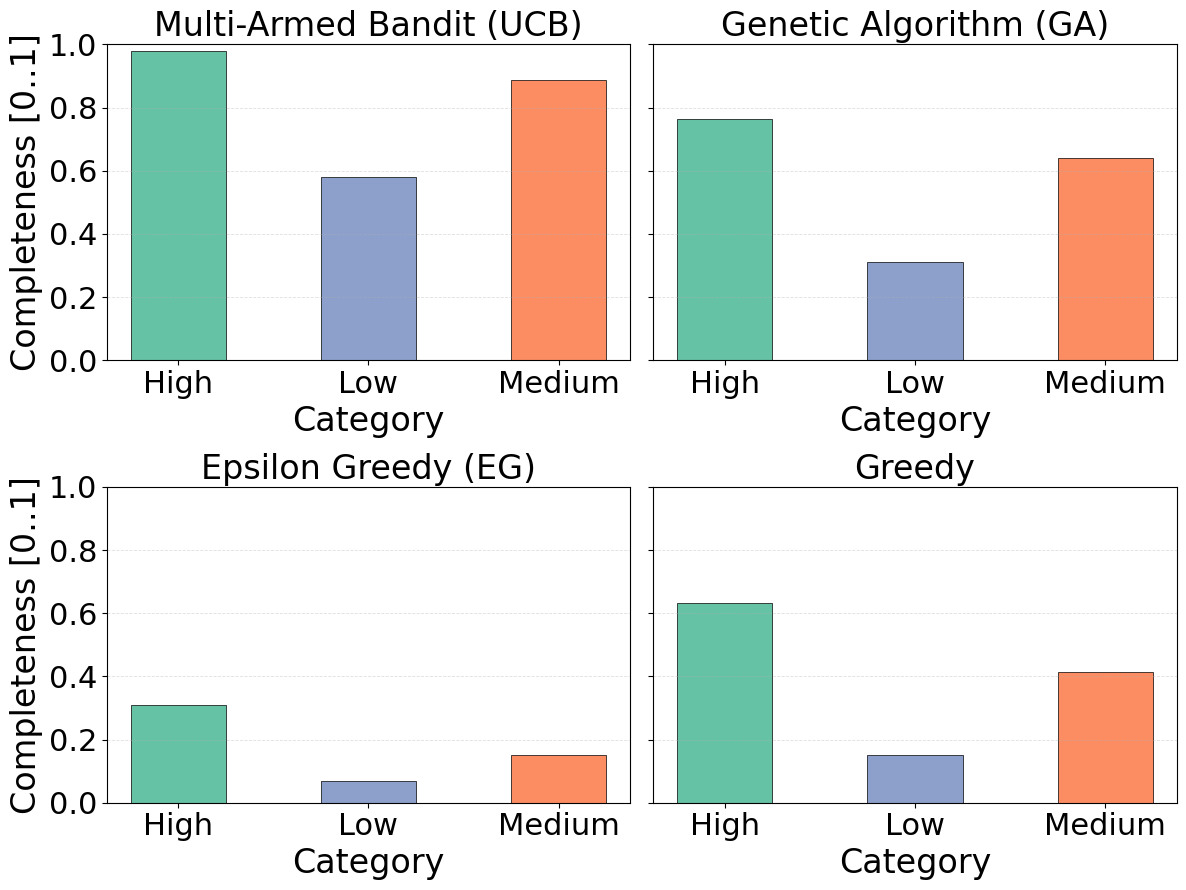

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================
DATA_DIR = "/content"
MANUAL_THRESHOLD = 0.875  # <<< set this manually

TECH_FILES = {
    "Multi-Armed Bandit (UCB)": "UCB_TOP1_ALL_RUNS_5.csv",
    "Genetic Algorithm (GA)": "GA_TOP10_ALL_RUNS_5.csv",
    "Epsilon Greedy (EG)": "EG_TOP10_ALL_RUNS_5.csv",
    "Greedy": "GREEDY_TOP10_ALL_RUNS_5.csv",
}

BUCKETS = {
    "Low":    [100, 200, 300],
    "Medium": [300, 400, 600],
    "High":   [700, 800, 900, 1000],
}
bucket_order = ["High", "Low", "Medium"]
keep_q = sorted(set(sum(BUCKETS.values(), [])))

BAR_WIDTH = 0.50

# =========================
# PICK COLOR MODE
# =========================
COLOR_MODE = "muted"   # "grayscale" or "muted"

if COLOR_MODE == "grayscale":
    # Clear grayscale meaning: Low=white, Medium=light gray, High=dark gray
    BUCKET_COLORS = {
        "Low": "#ffffff",
        "Medium": "#d9d9d9",
        "High": "#7a7a7a",
    }
    EDGE_COLOR = "black"
    EDGE_LW = 0.7
else:
    # IEEE-friendly muted colors (not bright)
    BUCKET_COLORS = {
        "Low": "#8da0cb",     # muted blue
        "Medium": "#fc8d62",  # muted orange
        "High": "#66c2a5",    # muted teal/green
    }
    EDGE_COLOR = "black"
    EDGE_LW = 0.5

# =========================
# FONT SIZES (increase ticks + labels)
# =========================
TITLE_FS = 24
AXIS_LABEL_FS = 24
TICK_FS = 22
YLABEL_FS = 24

# =========================
# Helper function
# =========================
def bucket_means_accuracy(csv_path: str) -> pd.Series:
    df = pd.read_csv(csv_path)

    if "Sampled_Services_Per_Query" not in df.columns or "MCS" not in df.columns:
        raise ValueError(f"Missing required columns in: {csv_path}")

    df = df[df["Sampled_Services_Per_Query"].isin(keep_q)].copy()
    df["Above_Threshold"] = df["MCS"] >= MANUAL_THRESHOLD

    acc_per_q = (
        df.groupby("Sampled_Services_Per_Query")["Above_Threshold"]
          .mean()
          .reset_index()
          .rename(columns={"Above_Threshold": "Accuracy"})
    )

    q_to_bucket = {q: b for b, qs in BUCKETS.items() for q in qs}
    acc_per_q["Bucket"] = acc_per_q["Sampled_Services_Per_Query"].map(q_to_bucket)

    means = (
        acc_per_q.groupby("Bucket")["Accuracy"]
                 .mean()
                 .reindex(bucket_order)
                 .fillna(0.0)
    )
    return means

# =========================
# Compute results
# =========================
results = {}
for title, fname in TECH_FILES.items():
    path = os.path.join(DATA_DIR, fname)
    if not os.path.exists(path):
        raise FileNotFoundError(f"Missing file: {path}")
    results[title] = bucket_means_accuracy(path)

# =========================
# Plot
# =========================
fig, axes = plt.subplots(2, 2, figsize=(12, 9), sharey=True)  # increased dimensions

titles = list(results.keys())

for ax, title in zip(axes.flatten(), titles):
    vals = results[title]

    colors = [BUCKET_COLORS[b] for b in bucket_order]
    ax.bar(
        bucket_order,
        vals.values,
        color=colors,
        width=BAR_WIDTH,
        edgecolor=EDGE_COLOR,
        linewidth=EDGE_LW
    )

    ax.set_title(title, fontsize=TITLE_FS)
    ax.set_xlabel("Category", fontsize=AXIS_LABEL_FS)
    ax.set_ylim(0, 1)
    ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.4)

    # tick font size (this is what you asked: xticks font size increased)
    ax.tick_params(axis="x", labelsize=TICK_FS)
    ax.tick_params(axis="y", labelsize=TICK_FS)

# Y-labels (left column only) - keep your wording, just fix bracket if you want
axes[0, 0].set_ylabel("Completeness [0..1]", fontsize=YLABEL_FS)
axes[1, 0].set_ylabel("Completeness [0..1]", fontsize=YLABEL_FS)

plt.tight_layout()
plt.savefig("k5_efficiency.pdf", format="pdf", bbox_inches="tight")
plt.show()

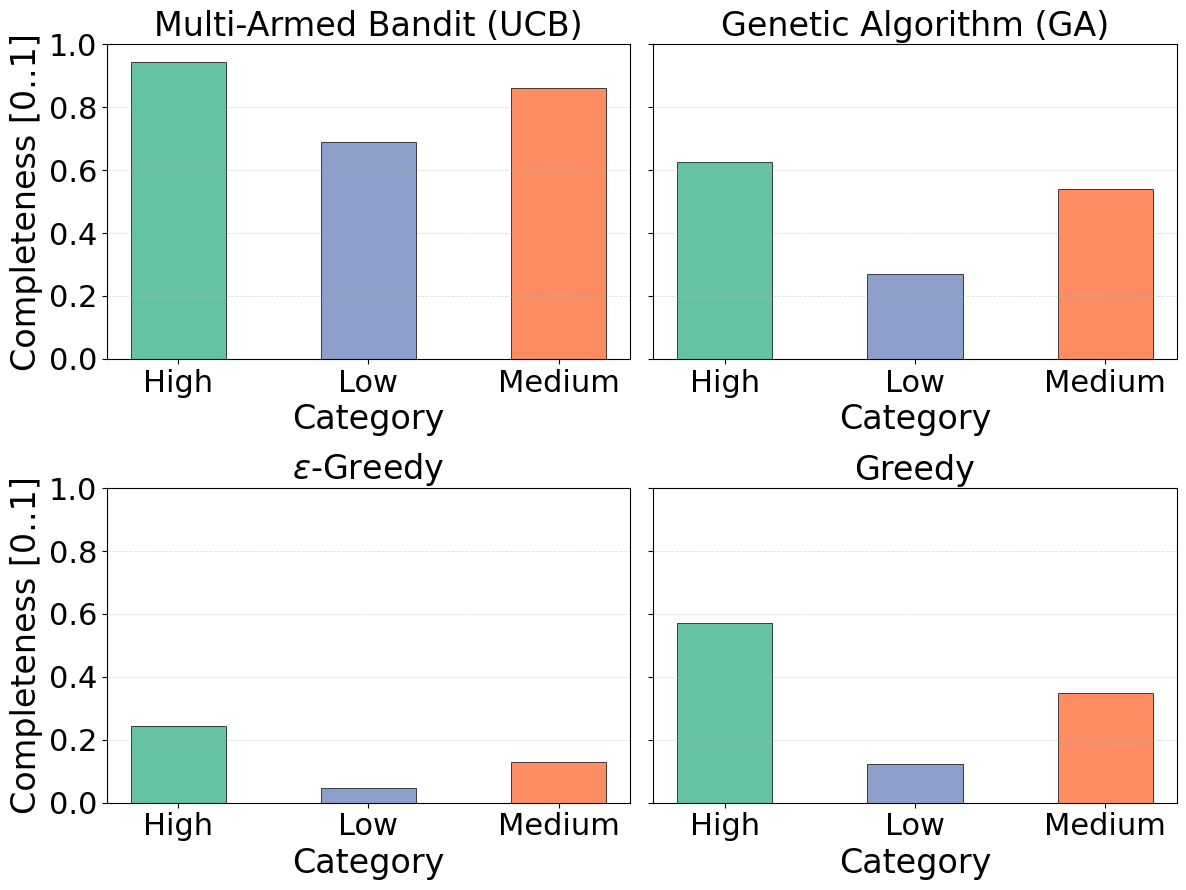

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================
DATA_DIR = "/content"
MANUAL_THRESHOLD = 0.89  # <<< set this manually

TECH_FILES = {
    "Multi-Armed Bandit (UCB)": "UCB_TOP1_ALL_RUNS_3.csv",
    "Genetic Algorithm (GA)": "GA_TOP10_ALL_RUNS_3.csv",
    r"$\epsilon$-Greedy": "EG_TOP10_ALL_RUNS_3.csv",
    "Greedy": "GREEDY_TOP10_ALL_RUNS_3.csv",
}

BUCKETS = {
    "Low":    [100, 200, 300],
    "Medium": [300, 400, 600],
    "High":   [700, 800, 900, 1000],
}
bucket_order = ["High", "Low", "Medium"]
keep_q = sorted(set(sum(BUCKETS.values(), [])))

BAR_WIDTH = 0.50

# =========================
# PICK COLOR MODE
# =========================
COLOR_MODE = "muted"   # "grayscale" or "muted"

if COLOR_MODE == "grayscale":
    # Clear grayscale meaning: Low=white, Medium=light gray, High=dark gray
    BUCKET_COLORS = {
        "Low": "#ffffff",
        "Medium": "#d9d9d9",
        "High": "#7a7a7a",
    }
    EDGE_COLOR = "black"
    EDGE_LW = 0.7
else:
    # IEEE-friendly muted colors (not bright)
    BUCKET_COLORS = {
        "Low": "#8da0cb",     # muted blue
        "Medium": "#fc8d62",  # muted orange
        "High": "#66c2a5",    # muted teal/green
    }
    EDGE_COLOR = "black"
    EDGE_LW = 0.5

# =========================
# FONT SIZES (increase ticks + labels)
# =========================
TITLE_FS = 24
AXIS_LABEL_FS = 24
TICK_FS = 22
YLABEL_FS = 24

# =========================
# Helper function
# =========================
def bucket_means_accuracy(csv_path: str) -> pd.Series:
    df = pd.read_csv(csv_path)

    if "Sampled_Services_Per_Query" not in df.columns or "MCS" not in df.columns:
        raise ValueError(f"Missing required columns in: {csv_path}")

    df = df[df["Sampled_Services_Per_Query"].isin(keep_q)].copy()
    df["Above_Threshold"] = df["MCS"] >= MANUAL_THRESHOLD

    acc_per_q = (
        df.groupby("Sampled_Services_Per_Query")["Above_Threshold"]
          .mean()
          .reset_index()
          .rename(columns={"Above_Threshold": "Accuracy"})
    )

    q_to_bucket = {q: b for b, qs in BUCKETS.items() for q in qs}
    acc_per_q["Bucket"] = acc_per_q["Sampled_Services_Per_Query"].map(q_to_bucket)

    means = (
        acc_per_q.groupby("Bucket")["Accuracy"]
                 .mean()
                 .reindex(bucket_order)
                 .fillna(0.0)
    )
    return means

# =========================
# Compute results
# =========================
results = {}
for title, fname in TECH_FILES.items():
    path = os.path.join(DATA_DIR, fname)
    if not os.path.exists(path):
        raise FileNotFoundError(f"Missing file: {path}")
    results[title] = bucket_means_accuracy(path)

# =========================
# Plot
# =========================
fig, axes = plt.subplots(2, 2, figsize=(12, 9), sharey=True)  # increased dimensions

titles = list(results.keys())

for ax, title in zip(axes.flatten(), titles):
    vals = results[title]

    colors = [BUCKET_COLORS[b] for b in bucket_order]
    ax.bar(
        bucket_order,
        vals.values,
        color=colors,
        width=BAR_WIDTH,
        edgecolor=EDGE_COLOR,
        linewidth=EDGE_LW
    )

    ax.set_title(title, fontsize=TITLE_FS)
    ax.set_xlabel("Category", fontsize=AXIS_LABEL_FS)
    ax.set_ylim(0, 1)
    ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.4)

    # tick font size (this is what you asked: xticks font size increased)
    ax.tick_params(axis="x", labelsize=TICK_FS)
    ax.tick_params(axis="y", labelsize=TICK_FS)

# Y-labels (left column only) - keep your wording, just fix bracket if you want
axes[0, 0].set_ylabel("Completeness [0..1]", fontsize=YLABEL_FS)
axes[1, 0].set_ylabel("Completeness [0..1]", fontsize=YLABEL_FS)

plt.tight_layout()
plt.savefig("k3_efficiency.pdf", format="pdf", bbox_inches="tight")
plt.show()

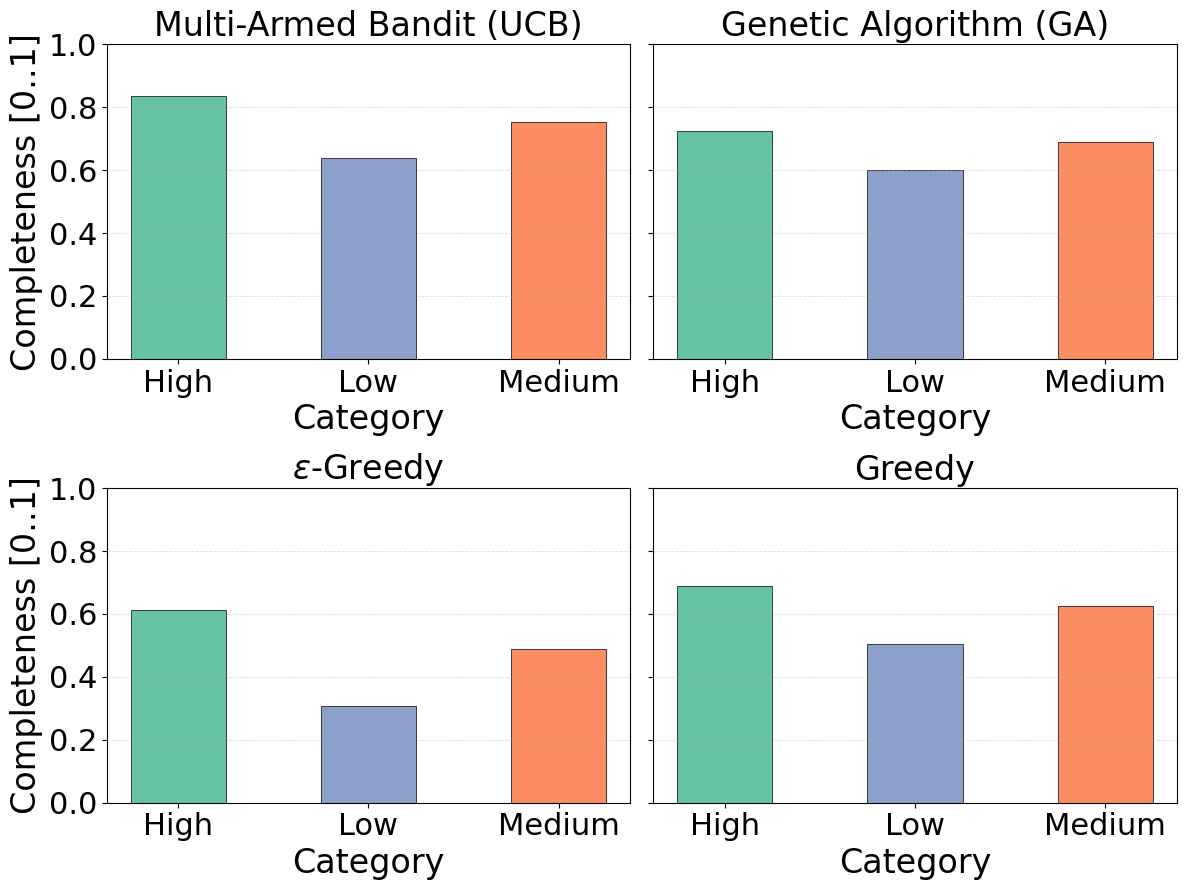

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================
DATA_DIR = "/content"
MANUAL_THRESHOLD = 0.815  # <<< set this manually

TECH_FILES = {
    "Multi-Armed Bandit (UCB)": "UCB_TOP1_ALL_RUNS_2.csv",
    "Genetic Algorithm (GA)": "GA_TOP10_ALL_RUNS_2.csv",
    r"$\epsilon$-Greedy": "EG_TOP10_ALL_RUNS_2.csv",
    "Greedy": "GREEDY_TOP10_ALL_RUNS_2.csv",
}

BUCKETS = {
    "Low":    [100, 200, 300],
    "Medium": [300, 400, 600],
    "High":   [700, 800, 900, 1000],
}
bucket_order = ["High", "Low", "Medium"]
keep_q = sorted(set(sum(BUCKETS.values(), [])))

BAR_WIDTH = 0.50

# =========================
# PICK COLOR MODE
# =========================
COLOR_MODE = "muted"   # "grayscale" or "muted"

if COLOR_MODE == "grayscale":
    # Clear grayscale meaning: Low=white, Medium=light gray, High=dark gray
    BUCKET_COLORS = {
        "Low": "#ffffff",
        "Medium": "#d9d9d9",
        "High": "#7a7a7a",
    }
    EDGE_COLOR = "black"
    EDGE_LW = 0.7
else:
    # IEEE-friendly muted colors (not bright)
    BUCKET_COLORS = {
        "Low": "#8da0cb",     # muted blue
        "Medium": "#fc8d62",  # muted orange
        "High": "#66c2a5",    # muted teal/green
    }
    EDGE_COLOR = "black"
    EDGE_LW = 0.5

# =========================
# FONT SIZES (increase ticks + labels)
# =========================
TITLE_FS = 24
AXIS_LABEL_FS = 24
TICK_FS = 22
YLABEL_FS = 24

# =========================
# Helper function
# =========================
def bucket_means_accuracy(csv_path: str) -> pd.Series:
    df = pd.read_csv(csv_path)

    if "Sampled_Services_Per_Query" not in df.columns or "MCS" not in df.columns:
        raise ValueError(f"Missing required columns in: {csv_path}")

    df = df[df["Sampled_Services_Per_Query"].isin(keep_q)].copy()
    df["Above_Threshold"] = df["MCS"] >= MANUAL_THRESHOLD

    acc_per_q = (
        df.groupby("Sampled_Services_Per_Query")["Above_Threshold"]
          .mean()
          .reset_index()
          .rename(columns={"Above_Threshold": "Accuracy"})
    )

    q_to_bucket = {q: b for b, qs in BUCKETS.items() for q in qs}
    acc_per_q["Bucket"] = acc_per_q["Sampled_Services_Per_Query"].map(q_to_bucket)

    means = (
        acc_per_q.groupby("Bucket")["Accuracy"]
                 .mean()
                 .reindex(bucket_order)
                 .fillna(0.0)
    )
    return means

# =========================
# Compute results
# =========================
results = {}
for title, fname in TECH_FILES.items():
    path = os.path.join(DATA_DIR, fname)
    if not os.path.exists(path):
        raise FileNotFoundError(f"Missing file: {path}")
    results[title] = bucket_means_accuracy(path)

# =========================
# Plot
# =========================
fig, axes = plt.subplots(2, 2, figsize=(12, 9), sharey=True)  # increased dimensions

titles = list(results.keys())

for ax, title in zip(axes.flatten(), titles):
    vals = results[title]

    colors = [BUCKET_COLORS[b] for b in bucket_order]
    ax.bar(
        bucket_order,
        vals.values,
        color=colors,
        width=BAR_WIDTH,
        edgecolor=EDGE_COLOR,
        linewidth=EDGE_LW
    )

    ax.set_title(title, fontsize=TITLE_FS)
    ax.set_xlabel("Category", fontsize=AXIS_LABEL_FS)
    ax.set_ylim(0, 1)
    ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.4)

    # tick font size (this is what you asked: xticks font size increased)
    ax.tick_params(axis="x", labelsize=TICK_FS)
    ax.tick_params(axis="y", labelsize=TICK_FS)

# Y-labels (left column only) - keep your wording, just fix bracket if you want
axes[0, 0].set_ylabel("Completeness [0..1]", fontsize=YLABEL_FS)
axes[1, 0].set_ylabel("Completeness [0..1]", fontsize=YLABEL_FS)

plt.tight_layout()
plt.savefig("k2_efficiency.pdf", format="pdf", bbox_inches="tight")
plt.show()

**Scalability**
---

<>:13: SyntaxWarning: invalid escape sequence '\e'
<>:13: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipython-input-3760626779.py:13: SyntaxWarning: invalid escape sequence '\e'
  "$\epsilon$-Greedy": "/content/dfstatistics_final_eg_samples_2.csv",


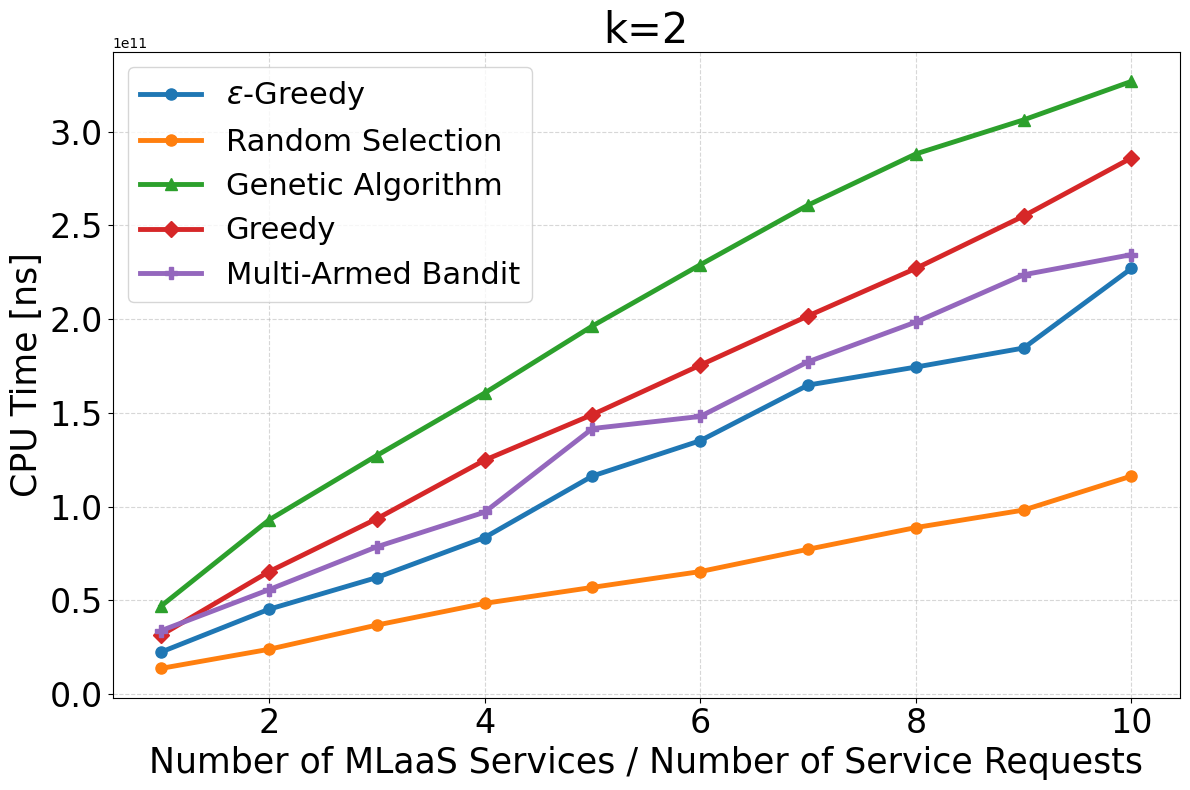

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================
# CONFIG
# =========================
DATA_DIR = "/content"


FILES = {
    "$\epsilon$-Greedy": "/content/dfstatistics_final_eg_samples_2.csv",
    "Random Selection" :"/content/dfstatistics_final_RF_2.csv",
    "Genetic Algorithm": "/content/dfstatistics_final_ga_samples_2.csv",
    "Greedy": "/content/dfstatistics_final_greedy_samples_2.csv",
    "Multi-Armed Bandit": "/content/dfstatistics_final_ucb_samples_2.csv",
}
TIME_COL = "Total_Time_Seconds"

# Different marker per method (shape)
MARKERS = {
    "Random Selection": "o",
    "Epsilon Greedy": "s",
    "Genetic Algorithm": "^",
    "Greedy": "D",
    "Multi-Armed Bandit": "P",
}

LINE_WIDTH = 3.5   # increased line width
MARKER_SIZE = 8    # slightly bigger marker

plt.figure(figsize=(12, 8))

for label, fname in FILES.items():
    path = os.path.join(DATA_DIR, fname)
    df = pd.read_csv(path)

    # Read time (seconds) -> convert to nanoseconds
    y_sec = pd.to_numeric(df[TIME_COL], errors="coerce").dropna().values
    y_ns = y_sec * 1e9  # ✅ seconds -> nanoseconds

    # x-axis: 1,2,3,...
    x = np.arange(1, len(y_ns) + 1)

    plt.plot(
        x,
        y_ns,
        marker=MARKERS.get(label, "o"),
        markersize=MARKER_SIZE,
        linewidth=LINE_WIDTH,
        label=label
    )
plt.xlabel("Number of MLaaS Services / Number of Service Requests", fontsize=25)
plt.ylabel("CPU Time [ns]", fontsize=25)  # ✅ corrected label
plt.title("k=2", fontsize=30)  # ✅ corrected label

plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=22)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig("k2.pdf", format="pdf", bbox_inches="tight")

plt.tight_layout()
plt.show()

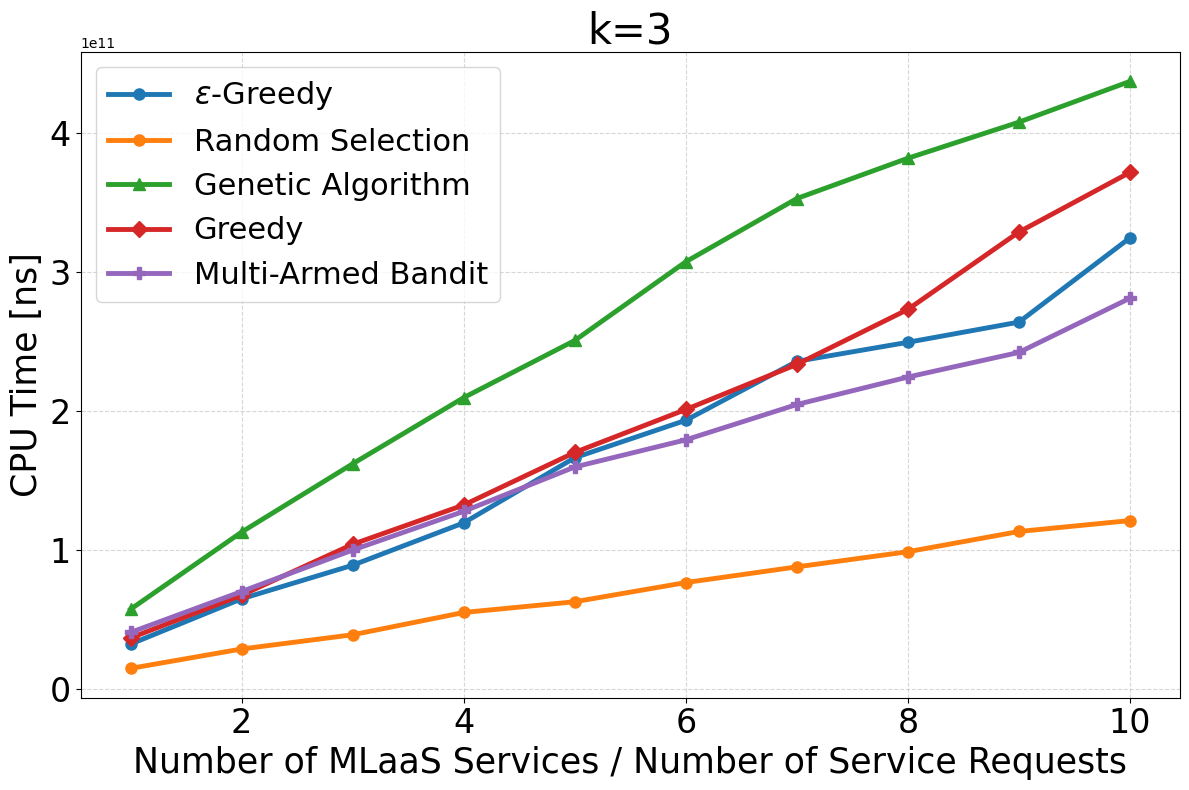

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================
# CONFIG
# =========================
DATA_DIR = "/content"

FILES = {
    r"$\epsilon$-Greedy": "dfstatistics_final_eg_samples_3.csv",
    "Random Selection" :"/content/dfstatistics_final_RF_3.csv",
    "Genetic Algorithm": "dfstatistics_final_ga_samples_3.csv",
    "Greedy": "dfstatistics_final_greedy_samples_3.csv",
    "Multi-Armed Bandit": "dfstatistics_final_ucb_samples_3.csv",
}
TIME_COL = "Total_Time_Seconds"

# Different marker per method (shape)
MARKERS = {
    "RF": "o",
    "Epsilon Greedy": "s",
    "Genetic Algorithm": "^",
    "Greedy": "D",
    "Multi-Armed Bandit": "P",
}
LINE_WIDTH = 3.5   # increased line width
MARKER_SIZE = 8    # slightly bigger marker
plt.figure(figsize=(12, 8))
for label, fname in FILES.items():
    path = os.path.join(DATA_DIR, fname)
    df = pd.read_csv(path)

    # Read time (seconds) -> convert to nanoseconds
    y_sec = pd.to_numeric(df[TIME_COL], errors="coerce").dropna().values
    y_ns = y_sec * 1e9  # ✅ seconds -> nanoseconds

    # x-axis: 1,2,3,...
    x = np.arange(1, len(y_ns) + 1)

    plt.plot(
        x,
        y_ns,
        marker=MARKERS.get(label, "o"),
        markersize=MARKER_SIZE,
        linewidth=LINE_WIDTH,
        label=label
    )
plt.xlabel("Number of MLaaS Services / Number of Service Requests", fontsize=25)
plt.ylabel("CPU Time [ns]", fontsize=25)  # ✅ corrected label
plt.title("k=3", fontsize=30)  # ✅ corrected label
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=22)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.savefig("k3.pdf", format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()

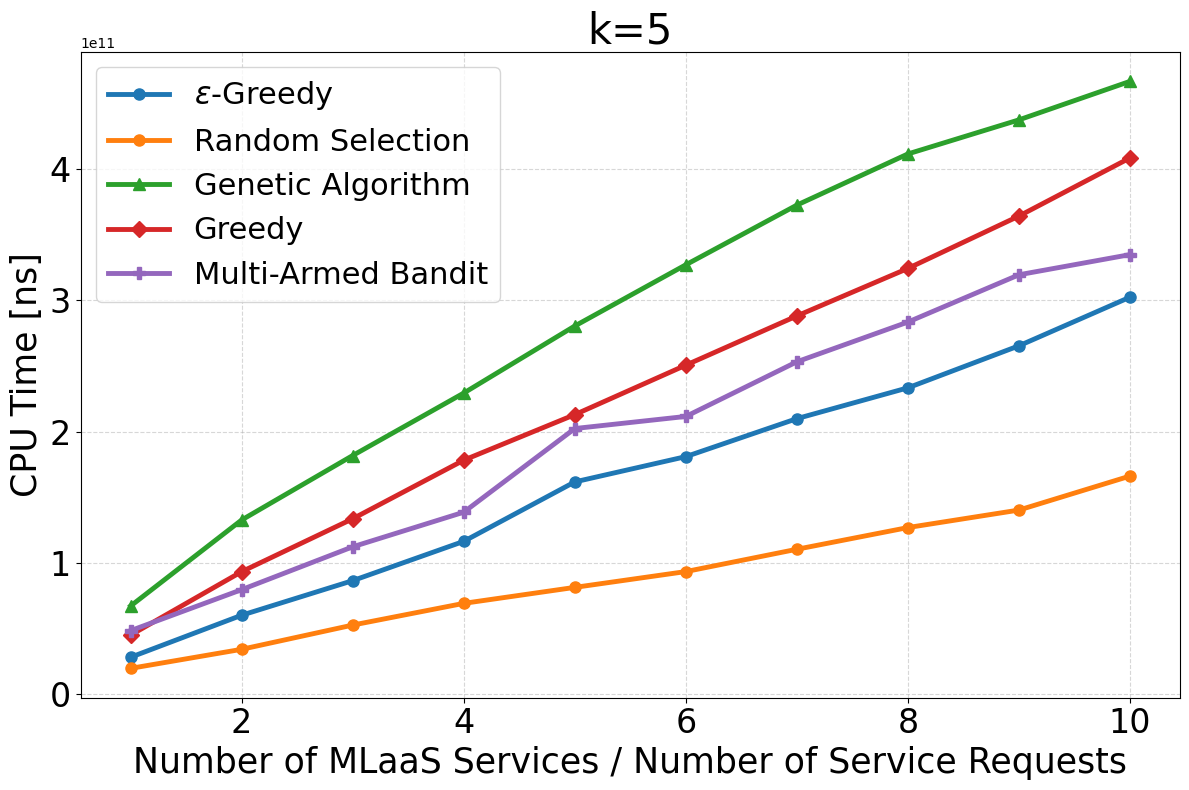

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================
# CONFIG
# =========================
DATA_DIR = "/content"

FILES = {
    r"$\epsilon$-Greedy": "dfstatistics_final_eg_samples_5.csv",
   "Random Selection":"dfstatistics_final_RF_5.csv",
    "Genetic Algorithm": "dfstatistics_final_ga_samples_5.csv",
    "Greedy": "dfstatistics_final_greedy_samples_5.csv",
    "Multi-Armed Bandit": "dfstatistics_final_ucb_samples_5.csv",
}

TIME_COL = "Total_Time_Seconds"

# Different marker per method (shape)
MARKERS = {
    "RF": "o",
    "Epsilon Greedy": "s",
    "Genetic Algorithm": "^",
    "Greedy": "D",
    "Multi-Armed Bandit": "P",
}

LINE_WIDTH = 3.5   # increased line width
MARKER_SIZE = 8    # slightly bigger marker
plt.figure(figsize=(12, 8))
for label, fname in FILES.items():
    path = os.path.join(DATA_DIR, fname)
    df = pd.read_csv(path)
    # Read time (seconds) -> convert to nanoseconds
    y_sec = pd.to_numeric(df[TIME_COL], errors="coerce").dropna().values
    y_ns = y_sec * 1e9  # ✅ seconds -> nanoseconds
    # x-axis: 1,2,3,...
    x = np.arange(1, len(y_ns) + 1)
    plt.plot(
        x,
        y_ns,
        marker=MARKERS.get(label, "o"),
        markersize=MARKER_SIZE,
        linewidth=LINE_WIDTH,
        label=label
    )
plt.xlabel("Number of MLaaS Services / Number of Service Requests", fontsize=25)
plt.ylabel("CPU Time [ns]", fontsize=25)  # ✅ corrected label
plt.title("k=5", fontsize=30)  # ✅ corrected label

plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(fontsize=22)

plt.xticks(fontsize=24)
plt.yticks(fontsize=24)

plt.savefig("k5.pdf", format="pdf", bbox_inches="tight")
plt.tight_layout()
plt.show()


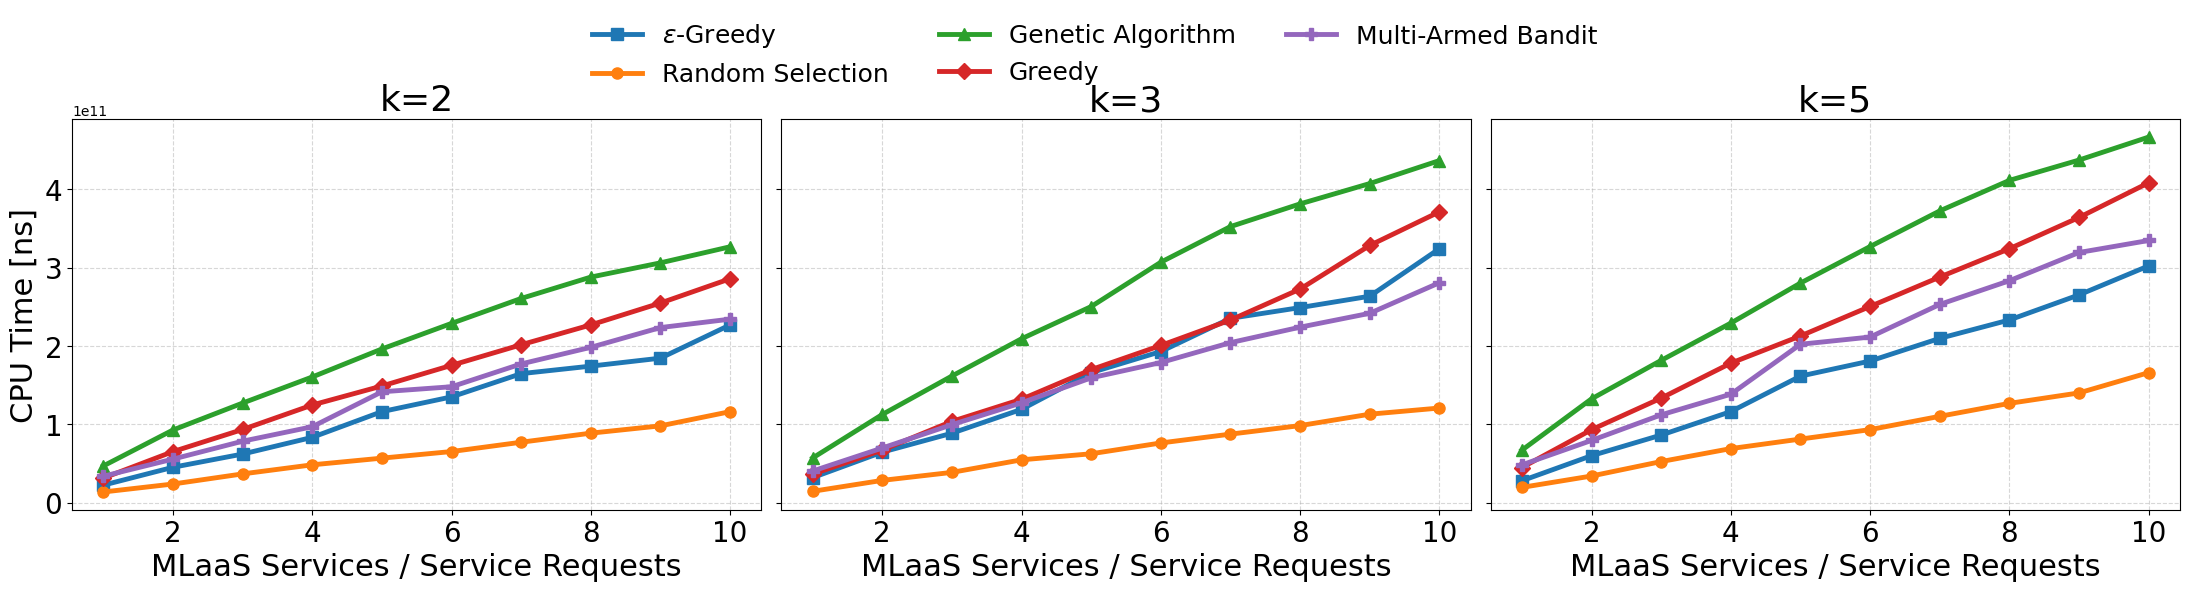

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================================================
# CONFIG
# =========================================================
DATA_DIR = "/content"
TIME_COL = "Total_Time_Seconds"

LINE_WIDTH = 3.5
MARKER_SIZE = 8

# Use ONE consistent label for epsilon-greedy everywhere (so markers match)
EPS_LABEL = r"$\epsilon$-Greedy"

# Markers must match labels exactly
MARKERS = {
    EPS_LABEL: "s",
    "Random Selection": "o",
    "Genetic Algorithm": "^",
    "Greedy": "D",
    "Multi-Armed Bandit": "P",
}

# Helper: robust path join (handles absolute paths)
def resolve_path(data_dir: str, fname: str) -> str:
    return fname if os.path.isabs(fname) else os.path.join(data_dir, fname)

# Helper: plot one k on a given axis
def plot_k(ax, k_title: str, files: dict):
    for label, fname in files.items():
        path = resolve_path(DATA_DIR, fname)
        df = pd.read_csv(path)
        df.columns = df.columns.str.strip()  # avoids hidden trailing spaces

        if TIME_COL not in df.columns:
            raise ValueError(f"[{k_title}] Missing column '{TIME_COL}' in: {path}")

        y_sec = pd.to_numeric(df[TIME_COL], errors="coerce").dropna().values
        if len(y_sec) == 0:
            # If a file has no valid numeric values, skip it (prevents silent empty line)
            print(f"⚠️ [{k_title}] No numeric time values for: {label} ({path})")
            continue

        y_ns = y_sec * 1e9  # seconds -> nanoseconds
        x = np.arange(1, len(y_ns) + 1)

        ax.plot(
            x, y_ns,
            marker=MARKERS.get(label, "o"),
            markersize=MARKER_SIZE,
            linewidth=LINE_WIDTH,
            label=label
        )

    ax.set_title(k_title, fontsize=26)
    ax.set_xlabel("MLaaS Services / Service Requests", fontsize=22)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.tick_params(axis="x", labelsize=20)
    ax.tick_params(axis="y", labelsize=20)

# =========================================================
# FILESETS FOR EACH SUBPLOT (EDIT ONLY FILENAMES HERE)
# =========================================================
FILES_K2 = {
    EPS_LABEL: "dfstatistics_final_eg_samples_2.csv",
    "Random Selection": "dfstatistics_final_RF_2.csv",
    "Genetic Algorithm": "dfstatistics_final_ga_samples_2.csv",
    "Greedy": "dfstatistics_final_greedy_samples_2.csv",
    "Multi-Armed Bandit": "dfstatistics_final_ucb_samples_2.csv",
}

FILES_K3 = {
    EPS_LABEL: "dfstatistics_final_eg_samples_3.csv",
    "Random Selection": "dfstatistics_final_RF_3.csv",
    "Genetic Algorithm": "dfstatistics_final_ga_samples_3.csv",
    "Greedy": "dfstatistics_final_greedy_samples_3.csv",
    "Multi-Armed Bandit": "dfstatistics_final_ucb_samples_3.csv",
}

# If you have k=5 files, put them here. If not, replace with whatever your third plot is.
FILES_K5 = {
    EPS_LABEL: "dfstatistics_final_eg_samples_5.csv",
    "Random Selection": "dfstatistics_final_RF_5.csv",
    "Genetic Algorithm": "dfstatistics_final_ga_samples_5.csv",
    "Greedy": "dfstatistics_final_greedy_samples_5.csv",
    "Multi-Armed Bandit": "dfstatistics_final_ucb_samples_5.csv",
}

# =========================================================
# 1×3 SIDE-BY-SIDE FIGURE
# =========================================================
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True)

plot_k(axes[0], "k=2", FILES_K2)
plot_k(axes[1], "k=3", FILES_K3)
plot_k(axes[2], "k=5", FILES_K5)  # change title/fileset if your 3rd plot is different

# One shared Y label on the left
axes[0].set_ylabel("CPU Time [ns]", fontsize=22)

# One legend for the whole figure (cleaner than 3 legends)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, fontsize=18, frameon=False)

# Tight layout + space for legend
plt.tight_layout(rect=[0, 0, 1, 0.88])

# Save as ONE PDF
plt.savefig("cpu_time_k2_k3_k5.pdf", format="pdf", bbox_inches="tight")

plt.show()


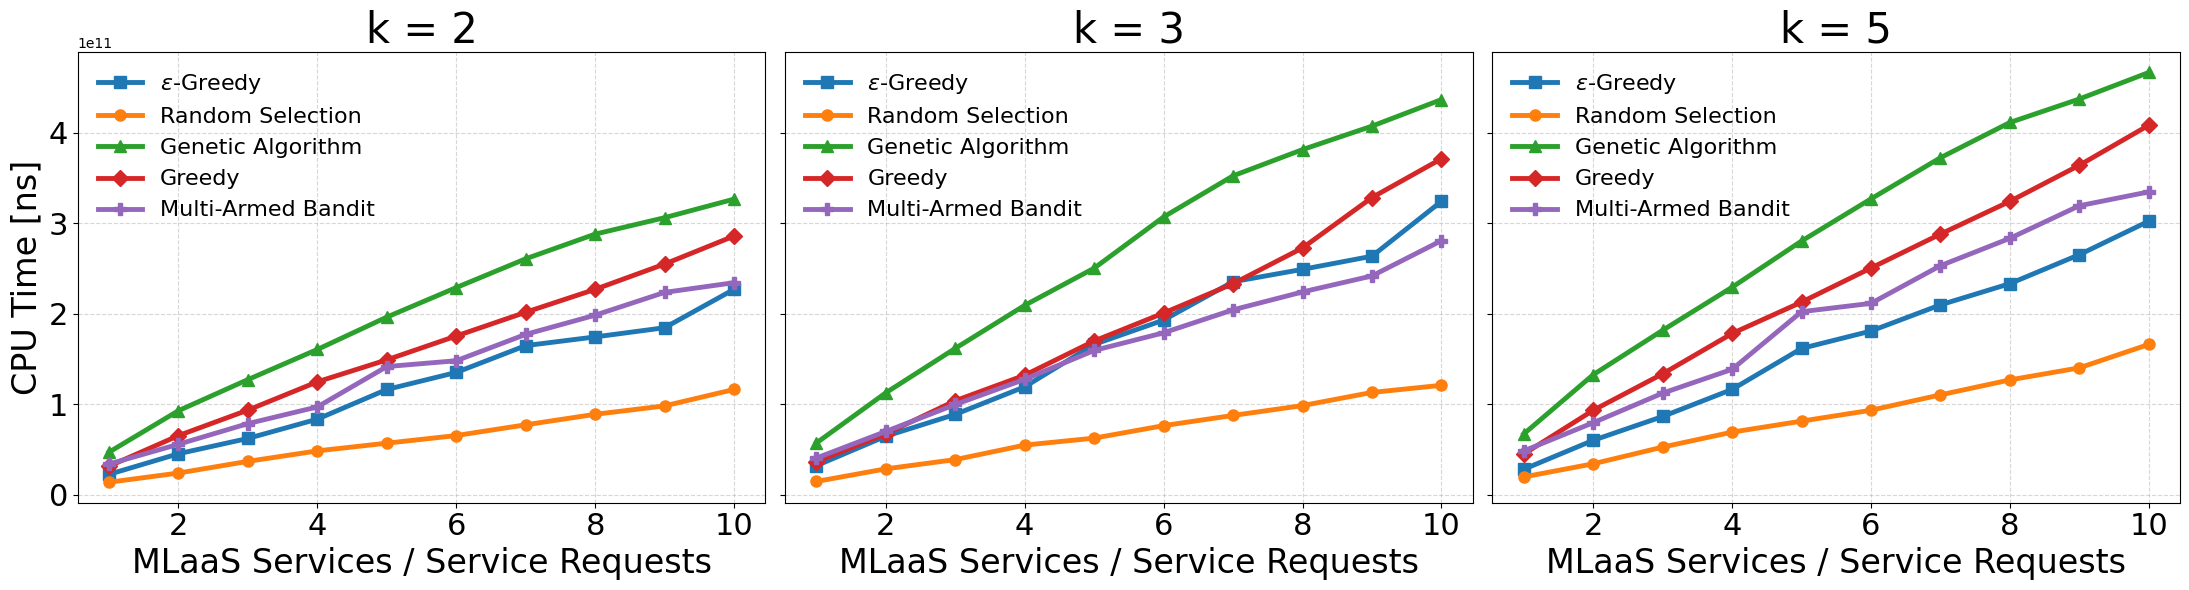

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# =========================================================
# CONFIG
# =========================================================
DATA_DIR = "/content"
TIME_COL = "Total_Time_Seconds"

LINE_WIDTH = 3.5
MARKER_SIZE = 8

EPS_LABEL = r"$\epsilon$-Greedy"

MARKERS = {
    EPS_LABEL: "s",
    "Random Selection": "o",
    "Genetic Algorithm": "^",
    "Greedy": "D",
    "Multi-Armed Bandit": "P",
}

# =========================================================
# FILE SETS
# =========================================================
FILES_K2 = {
    EPS_LABEL: "/content/dfstatistics_final_eg_samples_2.csv",
    "Random Selection": "/content/dfstatistics_final_RF_2.csv",
    "Genetic Algorithm": "/content/dfstatistics_final_ga_samples_2.csv",
    "Greedy": "/content/dfstatistics_final_greedy_samples_2.csv",
    "Multi-Armed Bandit": "/content/dfstatistics_final_ucb_samples_2.csv",
}

FILES_K3 = {
    EPS_LABEL: "/content/dfstatistics_final_eg_samples_3.csv",
    "Random Selection": "/content/dfstatistics_final_RF_3.csv",
    "Genetic Algorithm": "/content/dfstatistics_final_ga_samples_3.csv",
    "Greedy": "/content/dfstatistics_final_greedy_samples_3.csv",
    "Multi-Armed Bandit": "/content/dfstatistics_final_ucb_samples_3.csv",
}

FILES_K5 = {
    EPS_LABEL: "/content/dfstatistics_final_eg_samples_5.csv",
    "Random Selection": "/content/dfstatistics_final_RF_5.csv",
    "Genetic Algorithm": "/content/dfstatistics_final_ga_samples_5.csv",
    "Greedy": "/content/dfstatistics_final_greedy_samples_5.csv",
    "Multi-Armed Bandit": "/content/dfstatistics_final_ucb_samples_5.csv",
}

# =========================================================
# HELPERS
# =========================================================
def resolve_path(fname):
    return fname if os.path.isabs(fname) else os.path.join(DATA_DIR, fname)

def plot_k(ax, title, files):
    for label, fname in files.items():
        path = resolve_path(fname)
        df = pd.read_csv(path)
        df.columns = df.columns.str.strip()

        if TIME_COL not in df.columns:
            raise ValueError(f"[{title}] Missing column '{TIME_COL}' in {path}")

        y_sec = pd.to_numeric(df[TIME_COL], errors="coerce").dropna().values
        if len(y_sec) == 0:
            print(f"⚠️ [{title}] No valid data for {label}")
            continue

        y_ns = y_sec * 1e9
        x = np.arange(1, len(y_ns) + 1)

        ax.plot(
            x,
            y_ns,
            marker=MARKERS[label],
            markersize=MARKER_SIZE,
            linewidth=LINE_WIDTH,
            label=label
        )
    ax.set_title(title, fontsize=30)
    ax.set_xlabel("MLaaS Services / Service Requests", fontsize=24)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.tick_params(axis="x", labelsize=22)
    ax.tick_params(axis="y", labelsize=22)
    # ✅ Individual legend per subplot
    ax.legend(fontsize=16, frameon=False)
# =========================================================
# PLOT: 1 × 3 LAYOUT
# =========================================================
fig, axes = plt.subplots(1, 3, figsize=(22, 6), sharey=True)
plot_k(axes[0], "k = 2", FILES_K2)
plot_k(axes[1], "k = 3", FILES_K3)
plot_k(axes[2], "k = 5", FILES_K5)

# Shared Y-axis label
axes[0].set_ylabel("CPU Time [ns]", fontsize=24)

plt.tight_layout()
plt.savefig("Final_k2_k3_k5.pdf", format="pdf", bbox_inches="tight")
plt.show()


**Old CODE**
---

   Technique  Bucket  Accuracy
1         EG     Low     0.081
2         EG  Medium     0.201
0         EG    High     0.282
4         GA     Low     0.254
5         GA  Medium     0.519
3         GA    High     0.650
7     GREEDY     Low     0.204
8     GREEDY  Medium     0.469
6     GREEDY    High     0.642
10        RF     Low     0.204
11        RF  Medium     0.464
9         RF    High     0.646
13       UCB     Low     0.780
14       UCB  Medium     0.930
12       UCB    High     0.980


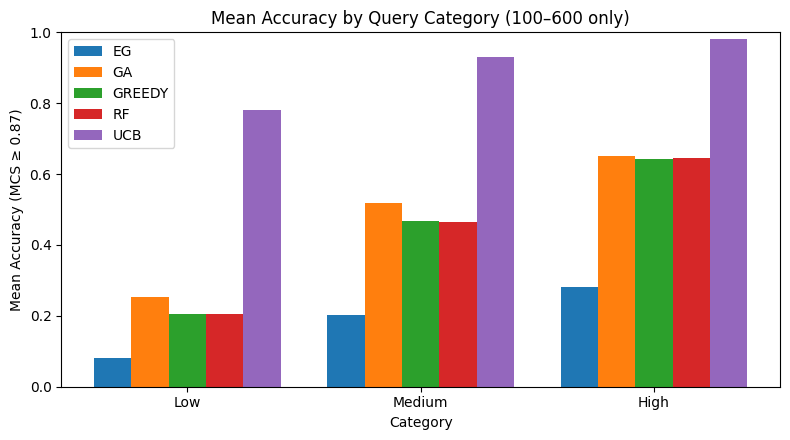

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================
DATA_DIR = "/content"
MANUAL_THRESHOLD = 0.87   # set this manually

FILES = [
    "EG_TOP10_ALL_RUNS.csv",
    "GA_TOP10_ALL_RUNS.csv",
    "GREEDY_TOP10_ALL_RUNS.csv",
    "RF_TOP10_ALL_RUNS.csv",
    "UCB_TOP1_ALL_RUNS.csv",
]

# Buckets you want (IGNORE 700 and 800)
BUCKETS = {
    "Low":    [100, 200,300],
    "Medium": [300, 400,600],
    "High":   [700, 800,900,1000],
}
KEEP_QUERY_SIZES = sorted(set(sum(BUCKETS.values(), [])))  # [100..600]

def technique_name(fname: str) -> str:
    return fname.split("_TOP")[0].strip()

# =========================
# BUILD accuracy per query-size per technique
# =========================
all_acc = []

for fname in FILES:
    path = os.path.join(DATA_DIR, fname)
    if not os.path.exists(path):
        print("Missing:", fname)
        continue

    tech = technique_name(fname)
    df = pd.read_csv(path)

    # Apply threshold
    df["Above_Threshold"] = df["MCS"] >= MANUAL_THRESHOLD

    # Accuracy per query size
    acc = (
        df.groupby("Sampled_Services_Per_Query")["Above_Threshold"]
          .mean()
          .reset_index()
          .rename(columns={"Above_Threshold": "Accuracy"})
    )
    acc["Technique"] = tech
    all_acc.append(acc)

acc_df = pd.concat(all_acc, ignore_index=True)

# =========================
# Keep only 100..600 (ignore 700, 800)
# =========================
acc_df = acc_df[acc_df["Sampled_Services_Per_Query"].isin(KEEP_QUERY_SIZES)].copy()

# =========================
# Map query size -> bucket
# =========================
query_to_bucket = {}
for b, qs in BUCKETS.items():
    for q in qs:
        query_to_bucket[q] = b

acc_df["Bucket"] = acc_df["Sampled_Services_Per_Query"].map(query_to_bucket)

# =========================
# Mean accuracy per bucket per technique
# =========================
bucket_means = (
    acc_df.groupby(["Technique", "Bucket"])["Accuracy"]
          .mean()
          .reset_index()
)

# Ensure order Low, Medium, High
bucket_order = ["Low", "Medium", "High"]
bucket_means["Bucket"] = pd.Categorical(bucket_means["Bucket"], categories=bucket_order, ordered=True)
bucket_means = bucket_means.sort_values(["Technique", "Bucket"])

print(bucket_means)

# =========================
# Plot: grouped 3 bars (Low/Medium/High) for each technique
# =========================
pivot = bucket_means.pivot(index="Bucket", columns="Technique", values="Accuracy").reindex(bucket_order).fillna(0.0)

x = np.arange(len(bucket_order))
techniques = list(pivot.columns)
n = len(techniques)
bar_w = 0.8 / max(n, 1)

plt.figure(figsize=(8, 4.5))

for i, tech in enumerate(techniques):
    plt.bar(x + (i - (n - 1) / 2) * bar_w, pivot[tech].values, width=bar_w, label=tech)

plt.xticks(x, bucket_order)
plt.xlabel("Category")
plt.ylabel(f"Mean Accuracy (MCS ≥ {MANUAL_THRESHOLD})")
plt.ylim(0, 1)
plt.title("Mean Accuracy by Query Category (100–600 only)")
plt.legend()
plt.tight_layout()
plt.show()


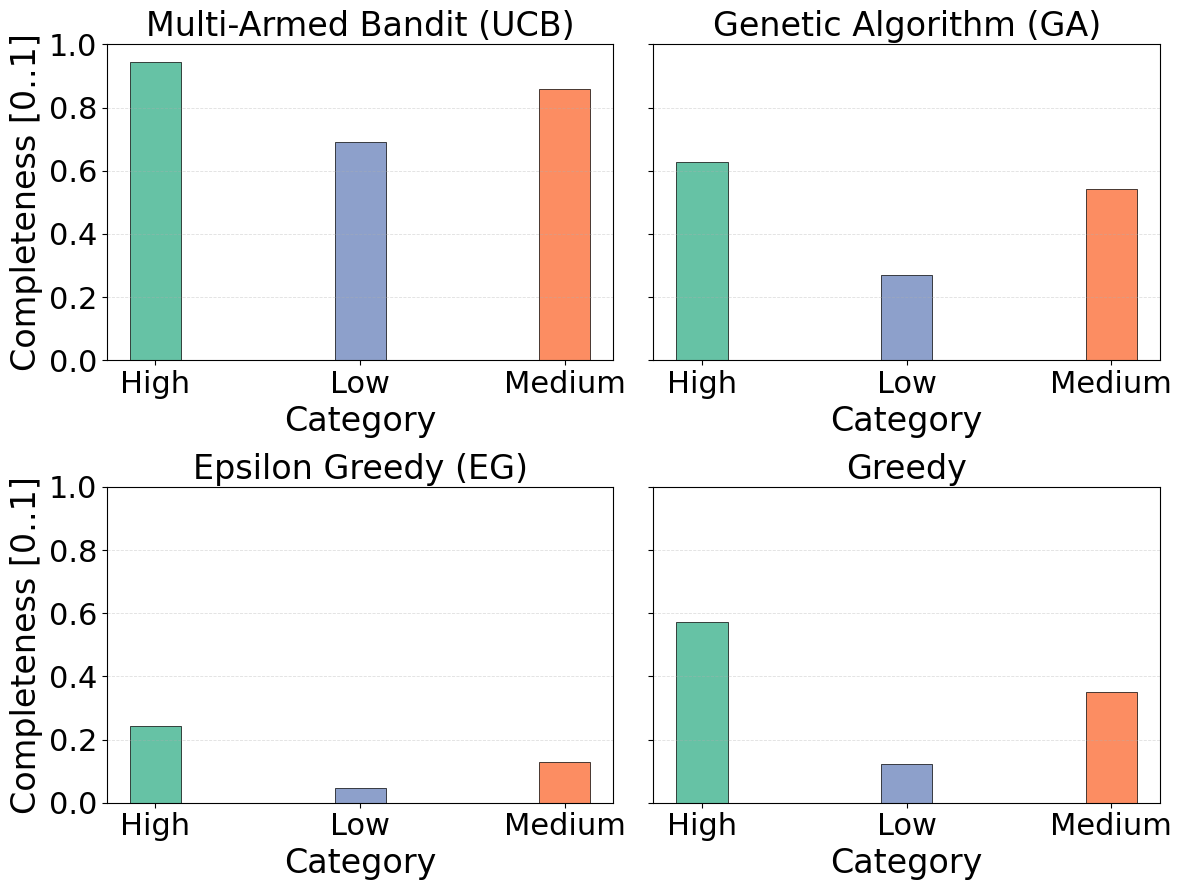

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================
DATA_DIR = "/content"
MANUAL_THRESHOLD = 0.89

TECH_FILES = {
    "Multi-Armed Bandit (UCB)": "UCB_TOP1_ALL_RUNS_3.csv",
    "Genetic Algorithm (GA)": "GA_TOP10_ALL_RUNS_3.csv",
    "Epsilon Greedy (EG)": "EG_TOP10_ALL_RUNS_3.csv",
    "Greedy": "GREEDY_TOP10_ALL_RUNS_3.csv",
}

BUCKETS = {
    "Low":    [100, 200, 300],
    "Medium": [300, 400, 600],
    "High":   [700, 800, 900, 1000],
}
bucket_order = ["High", "Low", "Medium"]
keep_q = sorted(set(sum(BUCKETS.values(), [])))

BAR_WIDTH = 0.25

# =========================
# PICK COLOR MODE
# =========================
COLOR_MODE = "muted"   # "grayscale" or "muted"

if COLOR_MODE == "grayscale":
    # Clear grayscale meaning: Low=white, Medium=light gray, High=dark gray
    BUCKET_COLORS = {
        "Low": "#ffffff",
        "Medium": "#d9d9d9",
        "High": "#7a7a7a",
    }
    EDGE_COLOR = "black"
    EDGE_LW = 0.7
else:
    # IEEE-friendly muted colors (not bright)
    BUCKET_COLORS = {
        "Low": "#8da0cb",     # muted blue
        "Medium": "#fc8d62",  # muted orange
        "High": "#66c2a5",    # muted teal/green
    }
    EDGE_COLOR = "black"
    EDGE_LW = 0.5

# =========================
# FONT SIZES (increase ticks + labels)
# =========================
TITLE_FS = 24
AXIS_LABEL_FS = 24
TICK_FS = 22
YLABEL_FS = 24

# =========================
# Helper function
# =========================
def bucket_means_accuracy(csv_path: str) -> pd.Series:
    df = pd.read_csv(csv_path)

    if "Sampled_Services_Per_Query" not in df.columns or "MCS" not in df.columns:
        raise ValueError(f"Missing required columns in: {csv_path}")

    df = df[df["Sampled_Services_Per_Query"].isin(keep_q)].copy()
    df["Above_Threshold"] = df["MCS"] >= MANUAL_THRESHOLD

    acc_per_q = (
        df.groupby("Sampled_Services_Per_Query")["Above_Threshold"]
          .mean()
          .reset_index()
          .rename(columns={"Above_Threshold": "Accuracy"})
    )

    q_to_bucket = {q: b for b, qs in BUCKETS.items() for q in qs}
    acc_per_q["Bucket"] = acc_per_q["Sampled_Services_Per_Query"].map(q_to_bucket)

    means = (
        acc_per_q.groupby("Bucket")["Accuracy"]
                 .mean()
                 .reindex(bucket_order)
                 .fillna(0.0)
    )
    return means

# =========================
# Compute results
# =========================
results = {}
for title, fname in TECH_FILES.items():
    path = os.path.join(DATA_DIR, fname)
    if not os.path.exists(path):
        raise FileNotFoundError(f"Missing file: {path}")
    results[title] = bucket_means_accuracy(path)

# =========================
# Plot
# =========================
fig, axes = plt.subplots(2, 2, figsize=(12, 9), sharey=True)  # increased dimensions

titles = list(results.keys())

for ax, title in zip(axes.flatten(), titles):
    vals = results[title]

    colors = [BUCKET_COLORS[b] for b in bucket_order]
    ax.bar(
        bucket_order,
        vals.values,
        color=colors,
        width=BAR_WIDTH,
        edgecolor=EDGE_COLOR,
        linewidth=EDGE_LW
    )

    ax.set_title(title, fontsize=TITLE_FS)
    ax.set_xlabel("Category", fontsize=AXIS_LABEL_FS)
    ax.set_ylim(0, 1)
    ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.4)

    # tick font size (this is what you asked: xticks font size increased)
    ax.tick_params(axis="x", labelsize=TICK_FS)
    ax.tick_params(axis="y", labelsize=TICK_FS)

# Y-labels (left column only) - keep your wording, just fix bracket if you want
axes[0, 0].set_ylabel("Completeness [0..1]", fontsize=YLABEL_FS)
axes[1, 0].set_ylabel("Completeness [0..1]", fontsize=YLABEL_FS)

plt.subplots_adjust(wspace=0.18, hspace=0.22)

plt.tight_layout()
plt.show()

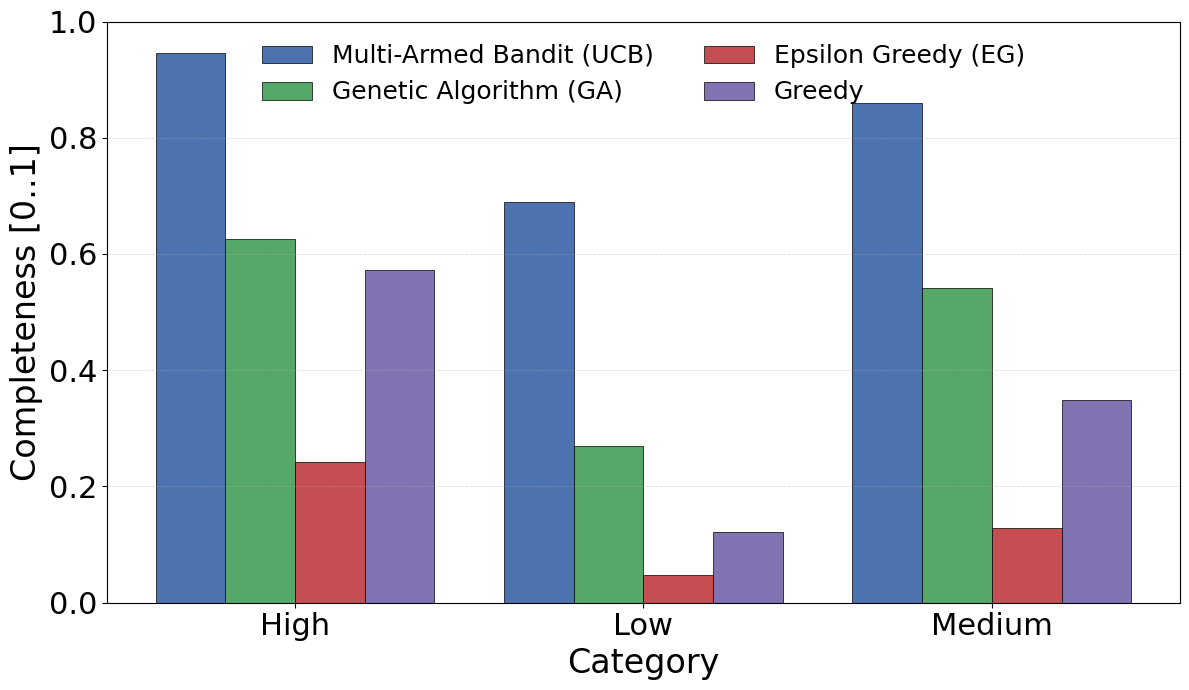

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================
DATA_DIR = "/content"
MANUAL_THRESHOLD = 0.89

TECH_FILES = {
    "Multi-Armed Bandit (UCB)": "UCB_TOP1_ALL_RUNS_3.csv",
    "Genetic Algorithm (GA)": "GA_TOP10_ALL_RUNS_3.csv",
    "Epsilon Greedy (EG)": "EG_TOP10_ALL_RUNS_3.csv",
    "Greedy": "GREEDY_TOP10_ALL_RUNS_3.csv",
}

BUCKETS = {
    "Low":    [100, 200, 300],
    "Medium": [300, 400, 600],
    "High":   [700, 800, 900, 1000],
}

# Keep your order for the x-axis
bucket_order = ["High", "Low", "Medium"]
keep_q = sorted(set(sum(BUCKETS.values(), [])))

# =========================
# COLORS (muted, IEEE-friendly)
# (colors represent METHODS now, not buckets)
# =========================
METHOD_COLORS = {
    "Multi-Armed Bandit (UCB)": "#4c72b0",  # muted blue
    "Genetic Algorithm (GA)":   "#55a868",  # muted green
    "Epsilon Greedy (EG)":      "#c44e52",  # muted red
    "Greedy":                   "#8172b2",  # muted purple
}

# =========================
# Fonts (use your big sizes)
# =========================
TITLE_FS = 24
AXIS_LABEL_FS = 24
TICK_FS = 22
LEGEND_FS = 18

# =========================
# Helper function (same as yours)
# =========================
def bucket_means_accuracy(csv_path: str) -> pd.Series:
    df = pd.read_csv(csv_path)

    if "Sampled_Services_Per_Query" not in df.columns or "MCS" not in df.columns:
        raise ValueError(f"Missing required columns in: {csv_path}")

    df = df[df["Sampled_Services_Per_Query"].isin(keep_q)].copy()
    df["Above_Threshold"] = df["MCS"] >= MANUAL_THRESHOLD

    acc_per_q = (
        df.groupby("Sampled_Services_Per_Query")["Above_Threshold"]
          .mean()
          .reset_index()
          .rename(columns={"Above_Threshold": "Accuracy"})
    )

    q_to_bucket = {q: b for b, qs in BUCKETS.items() for q in qs}
    acc_per_q["Bucket"] = acc_per_q["Sampled_Services_Per_Query"].map(q_to_bucket)

    means = (
        acc_per_q.groupby("Bucket")["Accuracy"]
                 .mean()
                 .reindex(bucket_order)
                 .fillna(0.0)
    )
    return means

# =========================
# Compute results (same idea)
# =========================
results = {}
for title, fname in TECH_FILES.items():
    path = os.path.join(DATA_DIR, fname)
    if not os.path.exists(path):
        raise FileNotFoundError(f"Missing file: {path}")
    results[title] = bucket_means_accuracy(path)

# =========================
# SINGLE PLOT: grouped bar chart
# =========================
methods = list(results.keys())
num_methods = len(methods)

x = np.arange(len(bucket_order))  # positions for High/Low/Medium
group_width = 0.80                # total width occupied by bars per category
bar_w = group_width / num_methods

fig, ax = plt.subplots(figsize=(12, 7))  # single plot, IEEE-ish

for i, m in enumerate(methods):
    vals = results[m].values  # order matches bucket_order
    ax.bar(
        x + (i - (num_methods - 1) / 2) * bar_w,
        vals,
        width=bar_w,
        label=m,
        color=METHOD_COLORS.get(m, None),
        edgecolor="black",
        linewidth=0.5
    )

ax.set_xticks(x)
ax.set_xticklabels(bucket_order, fontsize=TICK_FS)
ax.tick_params(axis="y", labelsize=TICK_FS)

ax.set_xlabel("Category", fontsize=AXIS_LABEL_FS)
ax.set_ylabel("Completeness [0..1]", fontsize=AXIS_LABEL_FS)
ax.set_ylim(0, 1)

ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.4)

# legend inside (top center) or outside; pick one
ax.legend(fontsize=LEGEND_FS, ncol=2, frameon=False, loc="upper center")

plt.tight_layout()
plt.show()


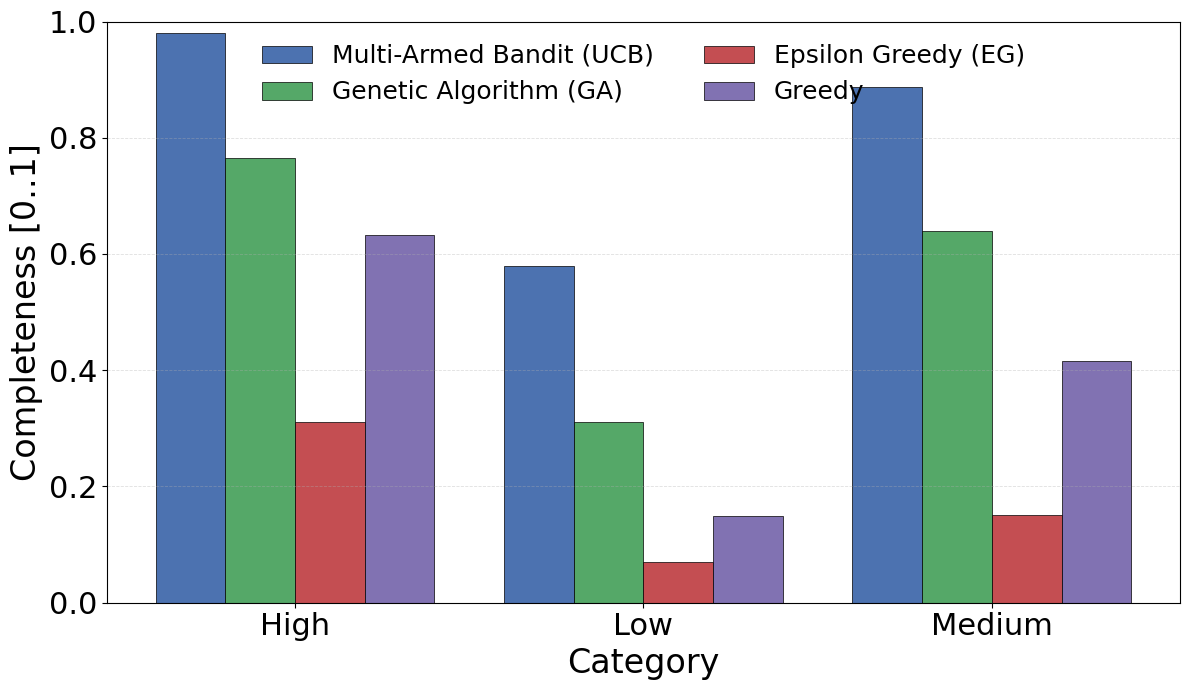

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================
DATA_DIR = "/content"
MANUAL_THRESHOLD = 0.875  # <<< set this manually

TECH_FILES = {
    "Multi-Armed Bandit (UCB)": "UCB_TOP1_ALL_RUNS_5.csv",
    "Genetic Algorithm (GA)": "GA_TOP10_ALL_RUNS_5.csv",
    "Epsilon Greedy (EG)": "EG_TOP10_ALL_RUNS_5.csv",
    "Greedy": "GREEDY_TOP10_ALL_RUNS_5.csv",
}


BUCKETS = {
    "Low":    [100, 200, 300],
    "Medium": [300, 400, 600],
    "High":   [700, 800, 900, 1000],
}

# Keep your order for the x-axis
bucket_order = ["High", "Low", "Medium"]
keep_q = sorted(set(sum(BUCKETS.values(), [])))

# =========================
# COLORS (muted, IEEE-friendly)
# (colors represent METHODS now, not buckets)
# =========================
METHOD_COLORS = {
    "Multi-Armed Bandit (UCB)": "#4c72b0",  # muted blue
    "Genetic Algorithm (GA)":   "#55a868",  # muted green
    "Epsilon Greedy (EG)":      "#c44e52",  # muted red
    "Greedy":                   "#8172b2",  # muted purple
}

# =========================
# Fonts (use your big sizes)
# =========================
TITLE_FS = 24
AXIS_LABEL_FS = 24
TICK_FS = 22
LEGEND_FS = 18

# =========================
# Helper function (same as yours)
# =========================
def bucket_means_accuracy(csv_path: str) -> pd.Series:
    df = pd.read_csv(csv_path)

    if "Sampled_Services_Per_Query" not in df.columns or "MCS" not in df.columns:
        raise ValueError(f"Missing required columns in: {csv_path}")

    df = df[df["Sampled_Services_Per_Query"].isin(keep_q)].copy()
    df["Above_Threshold"] = df["MCS"] >= MANUAL_THRESHOLD

    acc_per_q = (
        df.groupby("Sampled_Services_Per_Query")["Above_Threshold"]
          .mean()
          .reset_index()
          .rename(columns={"Above_Threshold": "Accuracy"})
    )

    q_to_bucket = {q: b for b, qs in BUCKETS.items() for q in qs}
    acc_per_q["Bucket"] = acc_per_q["Sampled_Services_Per_Query"].map(q_to_bucket)

    means = (
        acc_per_q.groupby("Bucket")["Accuracy"]
                 .mean()
                 .reindex(bucket_order)
                 .fillna(0.0)
    )
    return means

# =========================
# Compute results (same idea)
# =========================
results = {}
for title, fname in TECH_FILES.items():
    path = os.path.join(DATA_DIR, fname)
    if not os.path.exists(path):
        raise FileNotFoundError(f"Missing file: {path}")
    results[title] = bucket_means_accuracy(path)

# =========================
# SINGLE PLOT: grouped bar chart
# =========================
methods = list(results.keys())
num_methods = len(methods)

x = np.arange(len(bucket_order))  # positions for High/Low/Medium
group_width = 0.80                # total width occupied by bars per category
bar_w = group_width / num_methods

fig, ax = plt.subplots(figsize=(12, 7))  # single plot, IEEE-ish

for i, m in enumerate(methods):
    vals = results[m].values  # order matches bucket_order
    ax.bar(
        x + (i - (num_methods - 1) / 2) * bar_w,
        vals,
        width=bar_w,
        label=m,
        color=METHOD_COLORS.get(m, None),
        edgecolor="black",
        linewidth=0.5
    )

ax.set_xticks(x)
ax.set_xticklabels(bucket_order, fontsize=TICK_FS)
ax.tick_params(axis="y", labelsize=TICK_FS)

ax.set_xlabel("Category", fontsize=AXIS_LABEL_FS)
ax.set_ylabel("Completeness [0..1]", fontsize=AXIS_LABEL_FS)
ax.set_ylim(0, 1)

ax.grid(axis="y", linestyle="--", linewidth=0.6, alpha=0.4)

# legend inside (top center) or outside; pick one
ax.legend(fontsize=LEGEND_FS, ncol=2, frameon=False, loc="upper center")

plt.tight_layout()
plt.show()

**Old Exp**
---

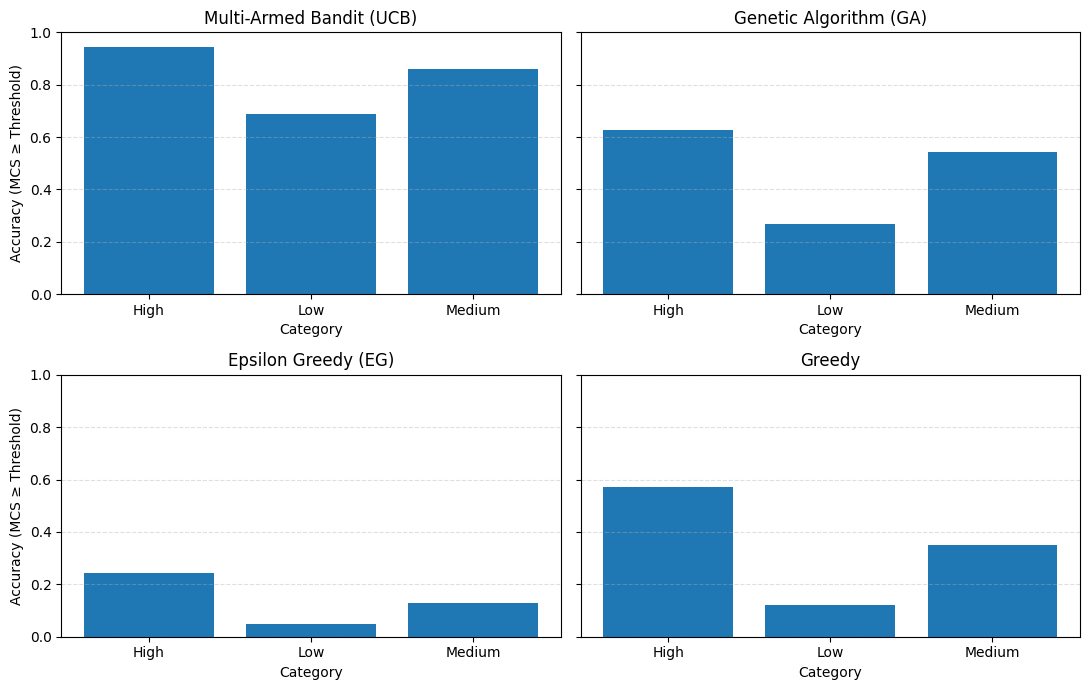

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================
DATA_DIR = "/content"
MANUAL_THRESHOLD = 0.89  # <<< set this manually

TECH_FILES = {
    "Multi-Armed Bandit (UCB)": "UCB_TOP1_ALL_RUNS_3.csv",
    "Genetic Algorithm (GA)": "GA_TOP10_ALL_RUNS_3.csv",
    "Epsilon Greedy (EG)": "EG_TOP10_ALL_RUNS_3.csv",
    "Greedy": "GREEDY_TOP10_ALL_RUNS_3.csv",
}

# Buckets you want (ignore 700 and 800)
BUCKETS = {
    "Low":    [100, 200,300],
    "Medium": [300, 400,600],
    "High":   [700, 800,900,1000],
}
bucket_order = ["High", "Low", "Medium"]
keep_q = sorted(set(sum(BUCKETS.values(), [])))  # [100,200,300,400,500,600]

# =========================
# Helper: compute bucket means (Accuracy) for one technique file
# =========================
def bucket_means_accuracy(csv_path: str) -> pd.Series:
    df = pd.read_csv(csv_path)

    # required columns
    if "Sampled_Services_Per_Query" not in df.columns or "MCS" not in df.columns:
        raise ValueError(f"Missing required columns in: {csv_path}")

    # keep only 100..600
    df = df[df["Sampled_Services_Per_Query"].isin(keep_q)].copy()

    # accuracy per query size (fraction above threshold)
    df["Above_Threshold"] = df["MCS"] >= MANUAL_THRESHOLD
    acc_per_q = (
        df.groupby("Sampled_Services_Per_Query")["Above_Threshold"]
          .mean()
          .reset_index()
          .rename(columns={"Above_Threshold": "Accuracy"})
    )

    # map query size to bucket
    q_to_bucket = {q: b for b, qs in BUCKETS.items() for q in qs}
    acc_per_q["Bucket"] = acc_per_q["Sampled_Services_Per_Query"].map(q_to_bucket)

    # mean accuracy per bucket
    means = (
        acc_per_q.groupby("Bucket")["Accuracy"]
                 .mean()
                 .reindex(bucket_order)
                 .fillna(0.0)
    )
    return means

# =========================
# Compute results for each technique
# =========================
results = {}
for title, fname in TECH_FILES.items():
    path = os.path.join(DATA_DIR, fname)
    if not os.path.exists(path):
        raise FileNotFoundError(f"Missing file: {path}")
    results[title] = bucket_means_accuracy(path)

# =========================
# Plot 2×2 grid
# =========================
fig, axes = plt.subplots(2, 2, figsize=(11, 7), sharey=True)

titles = list(results.keys())
for ax, title in zip(axes.flatten(), titles):
    vals = results[title]
    ax.bar(bucket_order, vals.values)
    ax.set_title(title)
    ax.set_xlabel("Category")
    ax.set_ylim(0, 1)
    ax.grid(True, axis="y", linestyle="--", alpha=0.4)

# y-label on left column
axes[0, 0].set_ylabel("Accuracy (MCS ≥ Threshold)")
axes[1, 0].set_ylabel("Accuracy (MCS ≥ Threshold)")
plt.tight_layout()
plt.show()

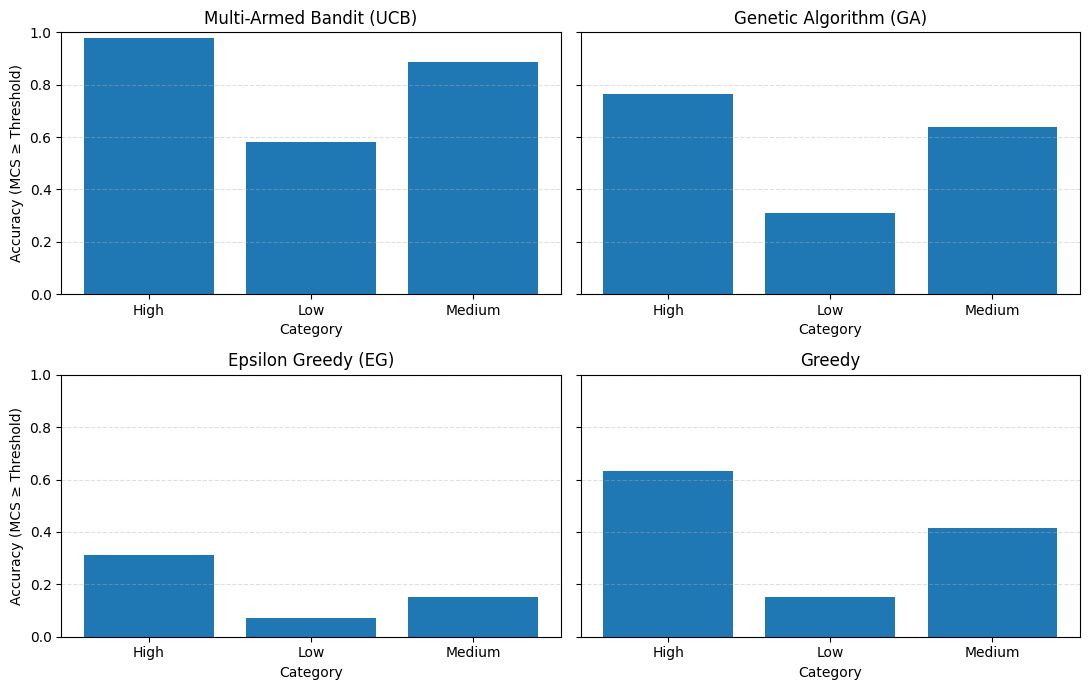

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# CONFIG
# =========================
DATA_DIR = "/content"
MANUAL_THRESHOLD = 0.875  # <<< set this manually

TECH_FILES = {
    "Multi-Armed Bandit (UCB)": "UCB_TOP1_ALL_RUNS_5.csv",
    "Genetic Algorithm (GA)": "GA_TOP10_ALL_RUNS_5.csv",
    "Epsilon Greedy (EG)": "EG_TOP10_ALL_RUNS_5.csv",
    "Greedy": "GREEDY_TOP10_ALL_RUNS_5.csv",
}

# Buckets you want (ignore 700 and 800)
BUCKETS = {
    "Low":    [100, 200,300],
    "Medium": [300, 400,600],
    "High":   [700, 800,900,1000],
}
bucket_order = ["High", "Low", "Medium"]
keep_q = sorted(set(sum(BUCKETS.values(), [])))  # [100,200,300,400,500,600]

# =========================
# Helper: compute bucket means (Accuracy) for one technique file
# =========================
def bucket_means_accuracy(csv_path: str) -> pd.Series:
    df = pd.read_csv(csv_path)

    # required columns
    if "Sampled_Services_Per_Query" not in df.columns or "MCS" not in df.columns:
        raise ValueError(f"Missing required columns in: {csv_path}")

    # keep only 100..600
    df = df[df["Sampled_Services_Per_Query"].isin(keep_q)].copy()

    # accuracy per query size (fraction above threshold)
    df["Above_Threshold"] = df["MCS"] >= MANUAL_THRESHOLD
    acc_per_q = (
        df.groupby("Sampled_Services_Per_Query")["Above_Threshold"]
          .mean()
          .reset_index()
          .rename(columns={"Above_Threshold": "Accuracy"})
    )

    # map query size to bucket
    q_to_bucket = {q: b for b, qs in BUCKETS.items() for q in qs}
    acc_per_q["Bucket"] = acc_per_q["Sampled_Services_Per_Query"].map(q_to_bucket)

    # mean accuracy per bucket
    means = (
        acc_per_q.groupby("Bucket")["Accuracy"]
                 .mean()
                 .reindex(bucket_order)
                 .fillna(0.0)
    )
    return means

# =========================
# Compute results for each technique
# =========================
results = {}
for title, fname in TECH_FILES.items():
    path = os.path.join(DATA_DIR, fname)
    if not os.path.exists(path):
        raise FileNotFoundError(f"Missing file: {path}")
    results[title] = bucket_means_accuracy(path)

# =========================
# Plot 2×2 grid
# =========================
fig, axes = plt.subplots(2, 2, figsize=(11, 7), sharey=True)

titles = list(results.keys())
for ax, title in zip(axes.flatten(), titles):
    vals = results[title]
    ax.bar(bucket_order, vals.values)
    ax.set_title(title)
    ax.set_xlabel("Category")
    ax.set_ylim(0, 1)
    ax.grid(True, axis="y", linestyle="--", alpha=0.4)

# y-label on left column
axes[0, 0].set_ylabel("Accuracy (MCS ≥ Threshold)")
axes[1, 0].set_ylabel("Accuracy (MCS ≥ Threshold)")
plt.tight_layout()
plt.show()

In [ ]:
df=pd.read_csv('/content/dfstatistics_final.csv')
df.head()
#

,Optimization_Type,Fixed_Num_Service_Requests_NQ,Sampled_Services_Per_Query,Ratio_NCES_over_NQ,Total_Attempted_Samples,Total_Valid_Evaluations,Total_Time_Seconds
0,RF,50,100,100.0,5000,5000,47.038403
1,RF,50,200,200.0,10000,10000,83.499718
2,RF,50,300,300.0,15000,15000,122.997099
3,RF,50,400,400.0,20000,20000,160.009005
4,RF,50,500,500.0,25000,25000,200.893598
